In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('housing data.csv')

In [6]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [7]:
# Shape of the data
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 1418
Columns: 13


In [8]:
# Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


From the above info we can see that there are few missing values in electrical, Garage type and lot of missing values in Fence and Misc Feature

In [9]:
# Since OveralQual, FullBath, GarageCars are numbers but they represent a 
# categorical data. Lets convert them to object datatype
for i in ['OverallQual','FullBath','GarageCars']:
    data[i] = data[i].astype(object)

In [10]:
# Lets drop ID since its just an index value from 1 to 1418
del data['Id']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1418 non-null   object
 1   YearBuilt    1418 non-null   int64 
 2   TotalBsmtSF  1418 non-null   int64 
 3   Electrical   1417 non-null   object
 4   GrLivArea    1418 non-null   int64 
 5   FullBath     1418 non-null   object
 6   GarageType   1275 non-null   object
 7   GarageCars   1418 non-null   object
 8   GarageArea   1418 non-null   int64 
 9   Fence        270 non-null    object
 10  MiscFeature  52 non-null     object
 11  SalePrice    1418 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 133.1+ KB


In [12]:
# lets look at the description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


From the five point summary we can get a hint of outliers in TotalBasmtSF, GrLivArea, GarageArea,
SalePrice

In [13]:
data.describe(include=object).T

,count,unique,top,freq
OverallQual,1418,10,5,380
Electrical,1417,5,SBrkr,1300
FullBath,1418,4,2,747
GarageType,1275,6,Attchd,800
GarageCars,1418,5,2,787
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


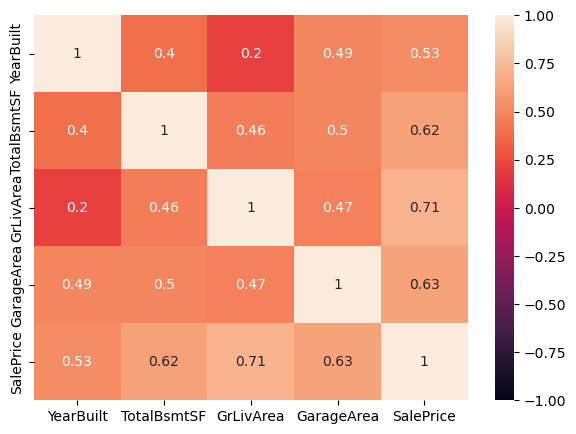

In [14]:
# Corelation Heatmap
#plt.rcParams['figure.figsize']=(7,5)
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [15]:
# Inferences:

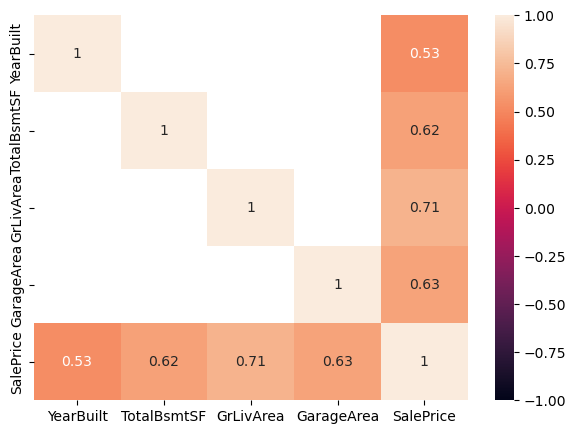

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr()[(data.corr()>0.5)|(data.corr()<-0.5)],annot=True,vmax=1,vmin=-1)
plt.show()

In [17]:
# Lets look at the coefficient of variance in columns
(data.select_dtypes(np.number).std()/data.select_dtypes(np.number).mean())*100

YearBuilt       1.524867
TotalBsmtSF    41.186073
GrLivArea      34.706296
GarageArea     45.717425
SalePrice      43.918480
dtype: float64

In [18]:
# inferences:

## UNIVARIATE ANALYSIS

In [19]:
# Take the number columns
data.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    1418 non-null   int64
 1   TotalBsmtSF  1418 non-null   int64
 2   GrLivArea    1418 non-null   int64
 3   GarageArea   1418 non-null   int64
 4   SalePrice    1418 non-null   int64
dtypes: int64(5)
memory usage: 55.5 KB


In [63]:
data_num = data.select_dtypes(include = np.number).kurt()
data_num.head()

YearBuilt      -0.405682
TotalBsmtSF    13.746812
GrLivArea       4.922480
GarageArea      0.855925
MiscFeature    22.390399
dtype: float64

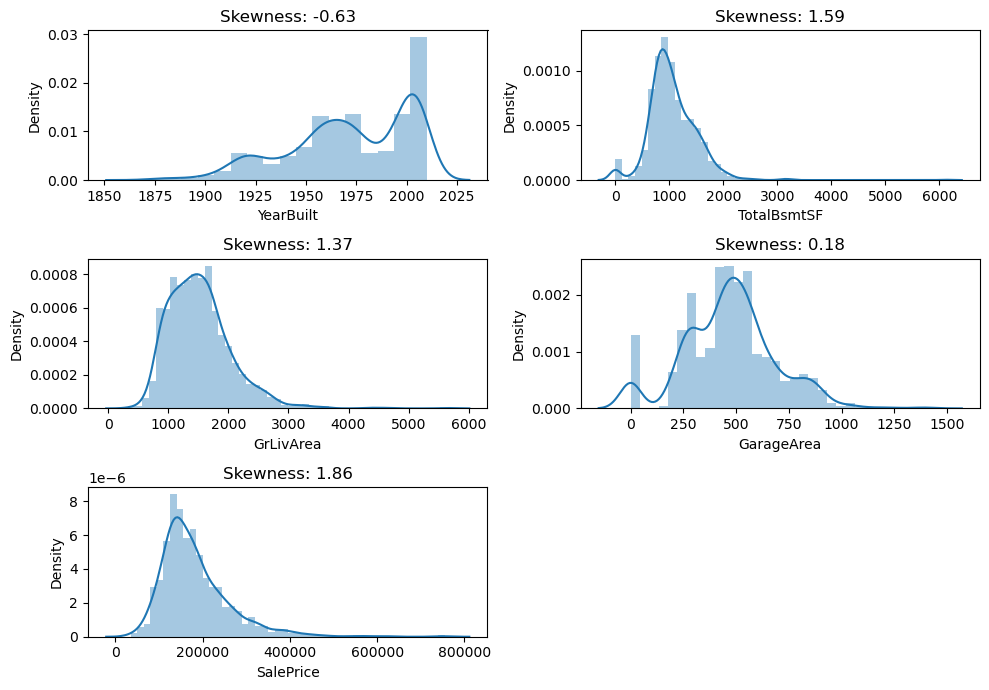

In [21]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title('Skewness: %.2f'%(data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

In [22]:
# Inferences: 

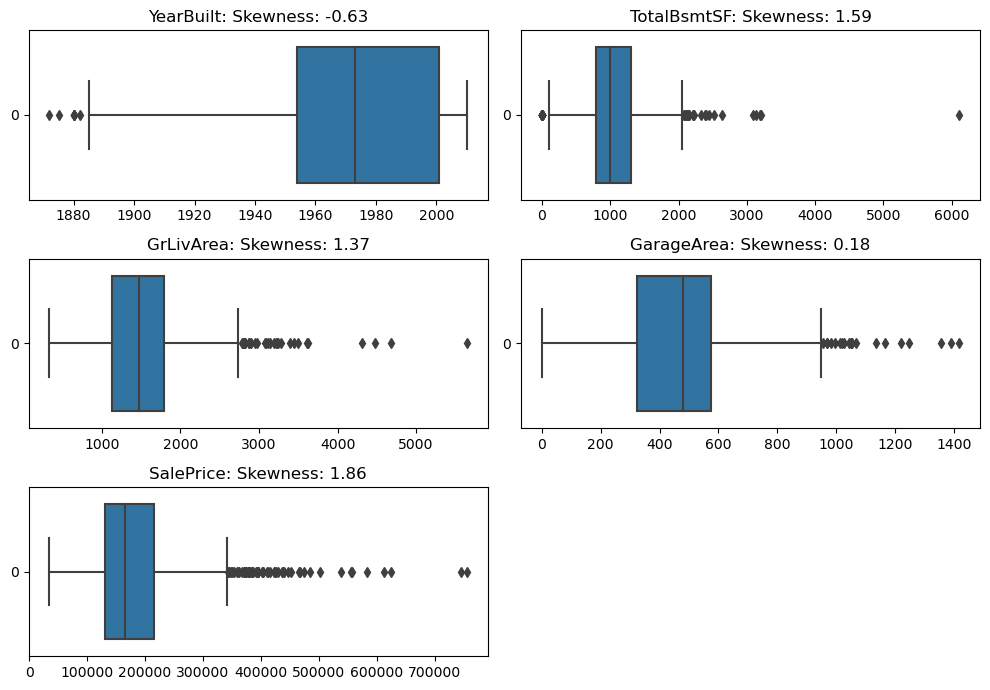

In [23]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.title('%s: Skewness: %.2f'%(i,data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

In [24]:
# Inferences: 

In [25]:
# Lets take category columns
data_cat = data.select_dtypes(object)
data_cat.head()

,OverallQual,Electrical,FullBath,GarageType,GarageCars,Fence,MiscFeature
0,7,SBrkr,2,Attchd,2,NaN,NaN
1,6,SBrkr,2,Attchd,2,NaN,NaN
2,7,SBrkr,2,Attchd,2,NaN,NaN
3,7,SBrkr,1,Detchd,3,NaN,NaN
4,8,SBrkr,2,Attchd,3,NaN,NaN


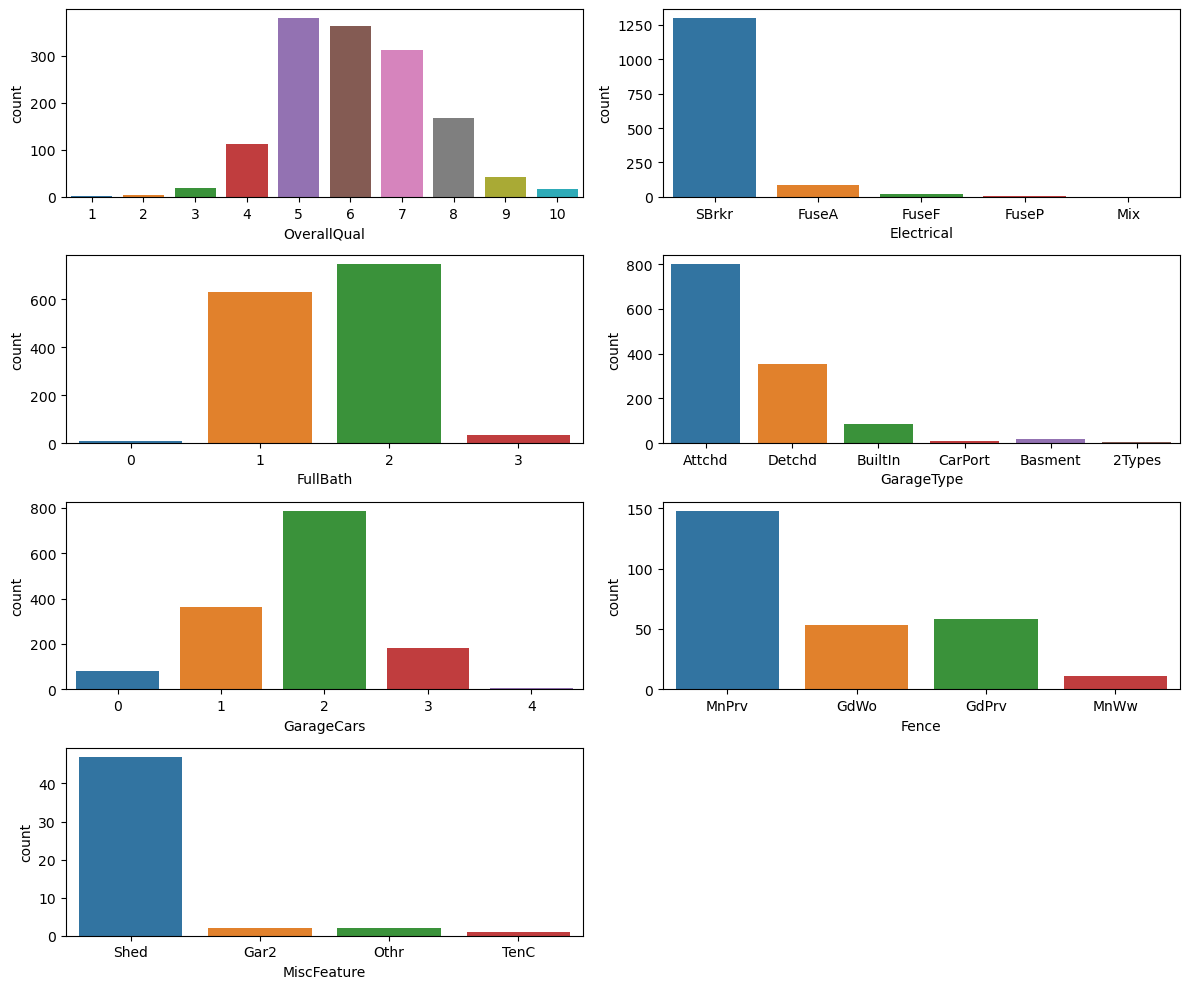

In [26]:
plt.figure(figsize=(12,10))
t=1
for i in data_cat.columns:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t=t+1
plt.tight_layout()
plt.show()

In [27]:
# inference

## BIVARIATE ANALYSIS

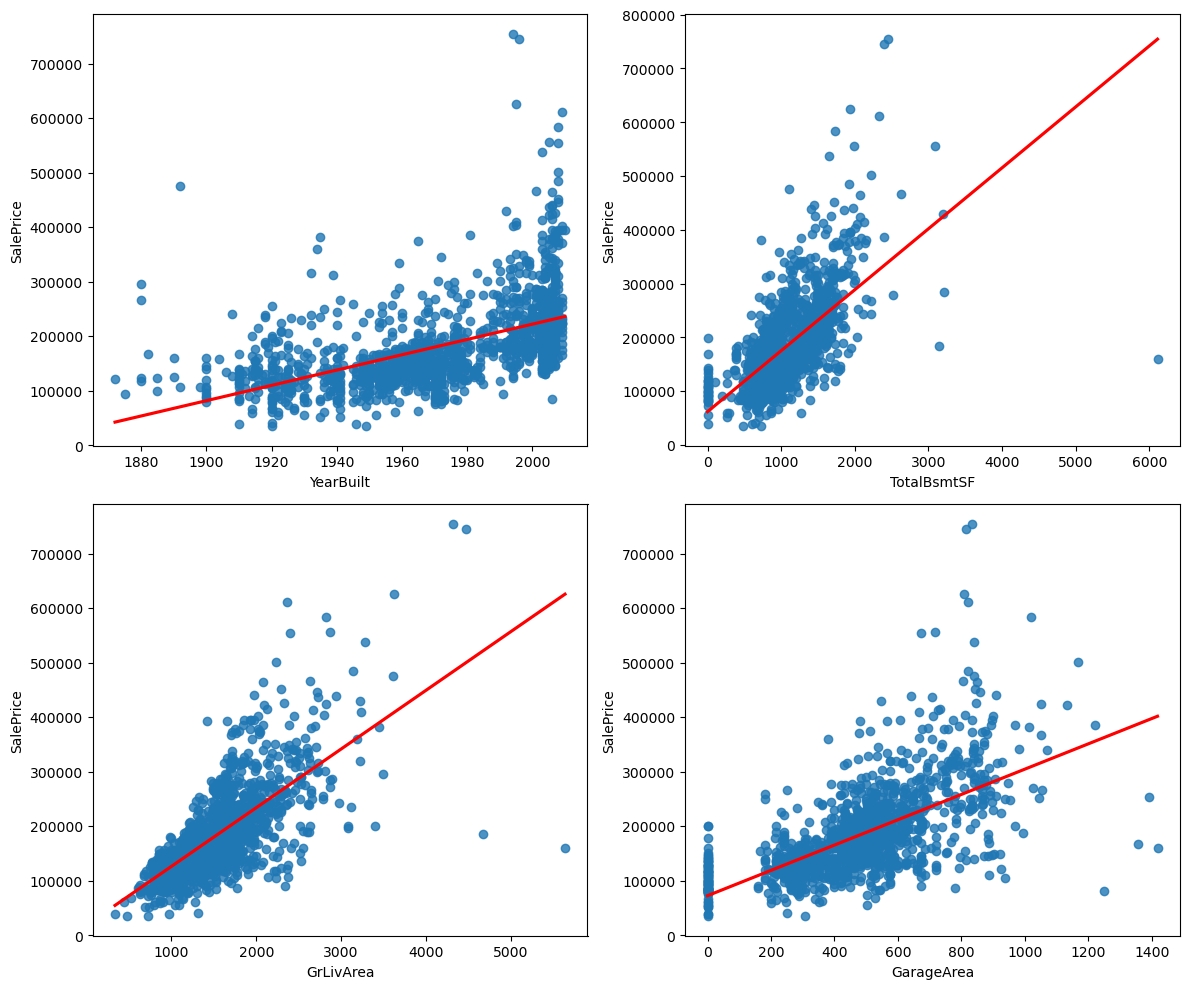

In [28]:
# Lets do Number vs Number analysis
plt.figure(figsize=(12,10))
t = 1
for i in data_num.columns:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data[i],y=data['SalePrice'],line_kws={'color':'red'},ci=0)
    t+=1
plt.tight_layout()
plt.show()

In [29]:
# inferences: 

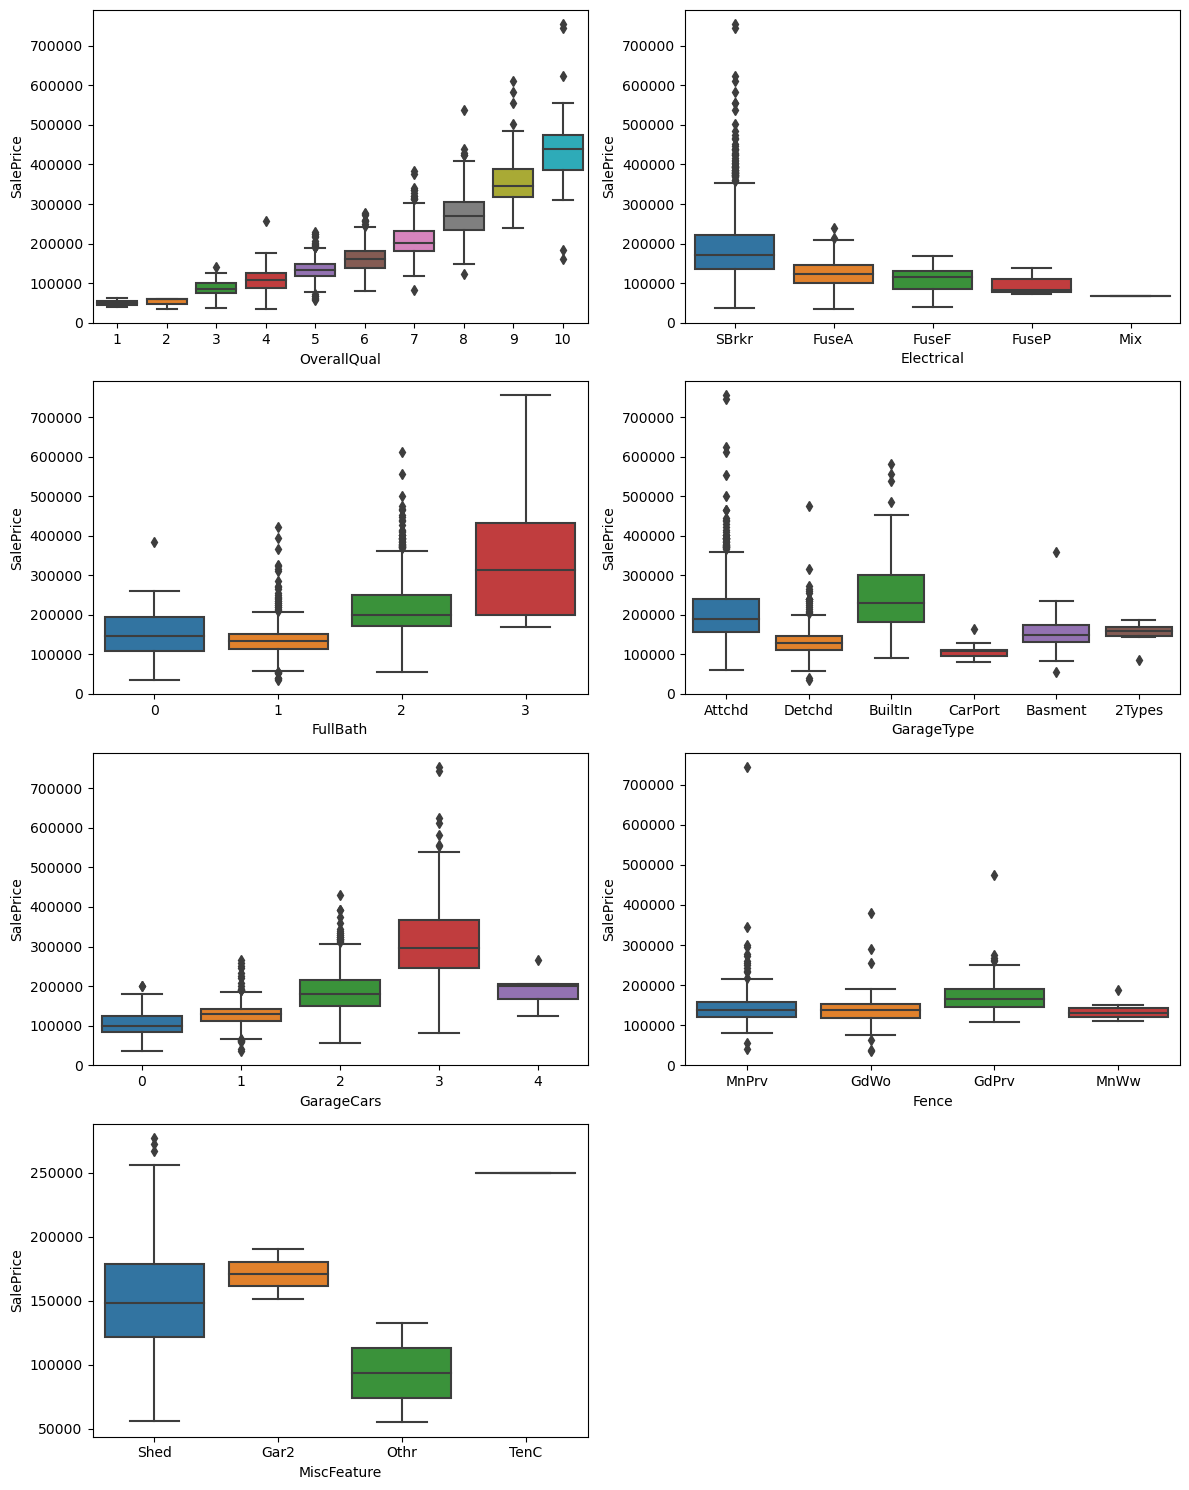

In [30]:
# Lets do Number vs category analysis
plt.figure(figsize=(12,15))
t = 1
for i in data_cat.columns:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

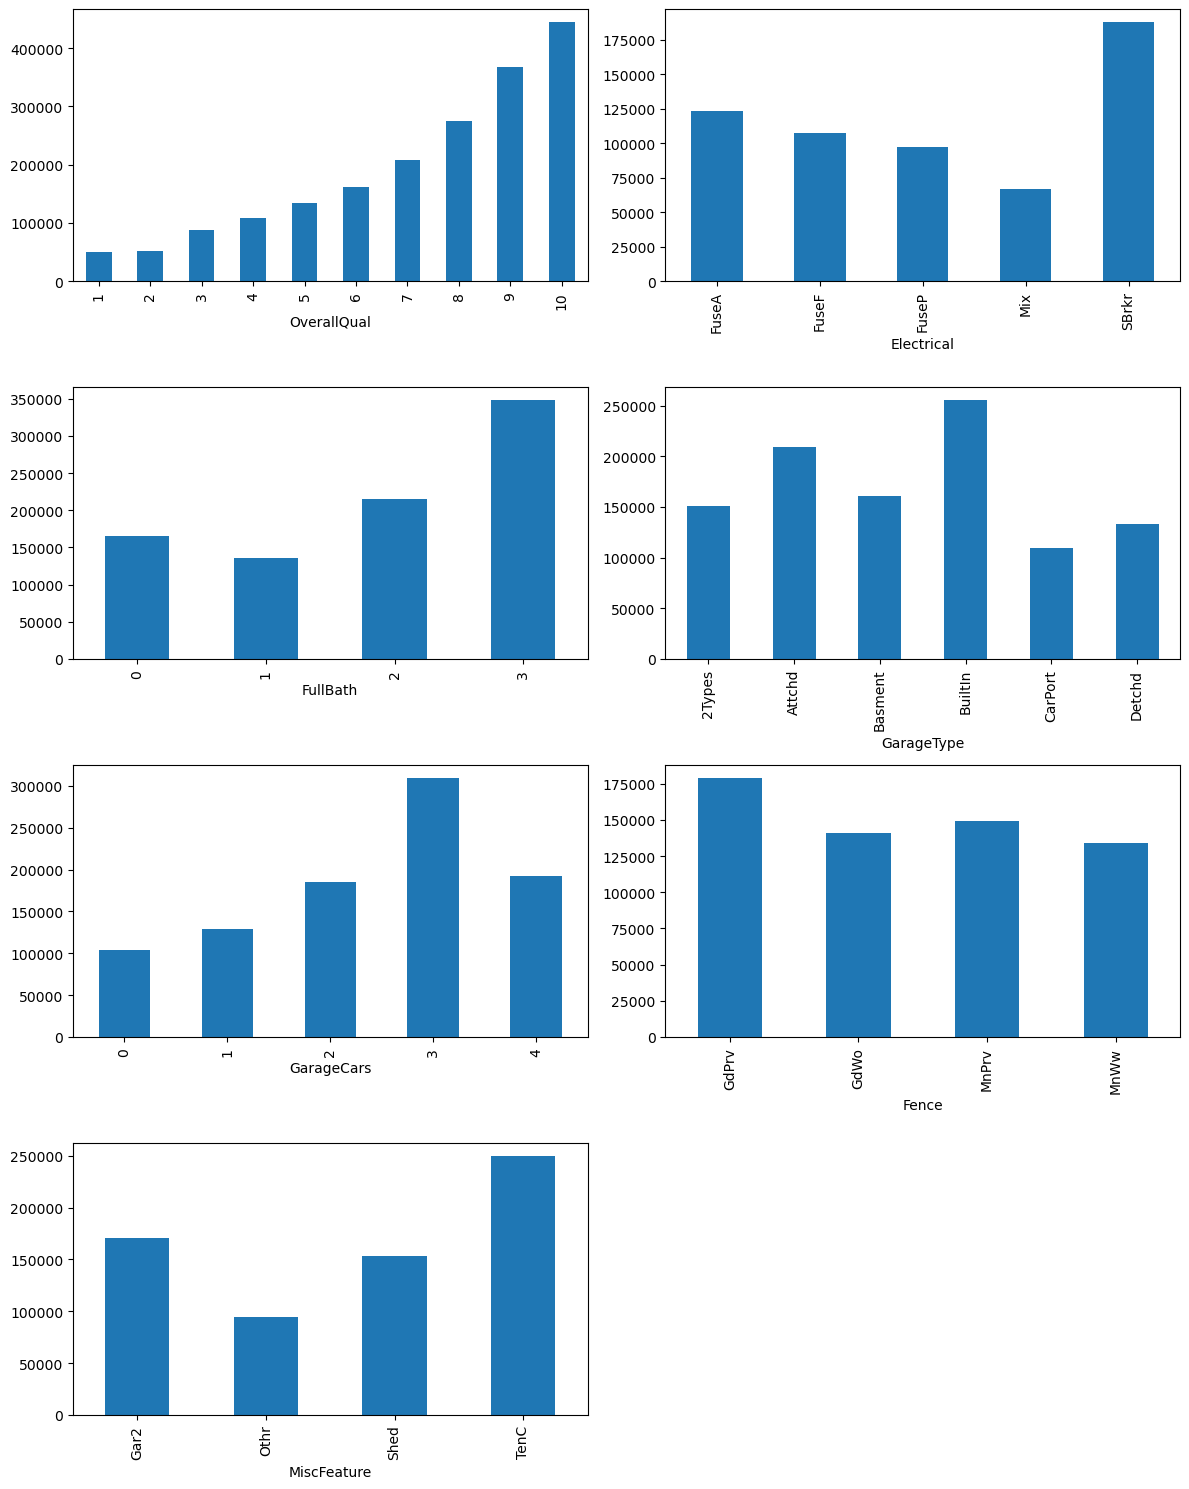

In [31]:
plt.figure(figsize=(12,15))
t = 1
for i in data_cat.columns:
    plt.subplot(4,2,t)
    data.groupby(i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

## Statistical test

In [32]:
# Target variable is mostly affected by:
# GrLivArea
# TotalBsmtsf
# OverallQual
# FullBath
# GarageCars

In [33]:
# SalePrice vs GrLivArea

# test the assumptions (Normality,equal variances)
for i in ['SalePrice','GrLivArea']:
    _,p = stats.shapiro(data[i])
    if p<0.05:
        print(i,'Reject the H0: Data is not normal')
    else:
        print(i,'Fail to reject H0: Data is normal')
        

_,p = stats.levene(data['SalePrice'],data['GrLivArea'])
if p<0.05:
    print(i,'Reject the H0: Variances are not equal')
else:
    print(i,'Fail to reject H0: Variances are equal')

SalePrice Reject the H0: Data is not normal
GrLivArea Reject the H0: Data is not normal
GrLivArea Reject the H0: Variances are not equal


In [34]:
# We will go with the non parametric test - mannwhitnyu
# H0: mu1 = mu2 : There is no relation between SalePrice and GrLivArea
# H1: mu1 != mu2 : There is relation between SalePrice and GrLivArea
_,p=stats.mannwhitneyu(data['SalePrice'],data['GrLivArea'])
if p<0.05:
    print('Reject H0: There is relation between SalePrice and GrLivArea')
else:
    print('Fail to reject H0: There is no relation between SalePrice and GrLivArea')

Reject H0: There is relation between SalePrice and GrLivArea


In [35]:
# SalePrice vs TotalBsmtSF

# test the assumptions (Normality,equal variances)
for i in ['SalePrice','TotalBsmtSF']:
    _,p = stats.shapiro(data[i])
    if p<0.05:
        print(i,'Reject the H0: Data is not normal')
    else:
        print(i,'Fail to reject H0: Data is normal')
        

_,p = stats.levene(data['SalePrice'],data['TotalBsmtSF'])
if p<0.05:
    print(i,'Reject the H0: Variances are not equal')
else:
    print(i,'Fail to reject H0: Variances are equal')

SalePrice Reject the H0: Data is not normal
TotalBsmtSF Reject the H0: Data is not normal
TotalBsmtSF Reject the H0: Variances are not equal


In [36]:
# We will go with the non parametric test - mannwhitnyu
# H0: mu1 = mu2 : There is no relation between SalePrice and TotalBsmtSF
# H1: mu1 != mu2 : There is relation between SalePrice and TotalBsmtSF
_,p=stats.mannwhitneyu(data['SalePrice'],data['TotalBsmtSF'])
if p<0.05:
    print('Reject H0: There is relation between SalePrice and TotalBsmtSF')
else:
    print('Fail to reject H0: There is no relation between SalePrice and TotalBsmtSF')

Reject H0: There is relation between SalePrice and TotalBsmtSF


In [37]:
# Lets check wether there is any effect of FullBath on sale price

# Lets check the assumptions

for i in range(0,4):
    _,p = stats.shapiro(data[data['FullBath']==i]['SalePrice'])
    if p<0.05:
        print('FullBath',i,'Reject the H0: Data is not normal')
    else:
        print('FullBath',i,'Fail to reject H0: Data is normal')
        
samp1 = data[data['FullBath']==0]['SalePrice']
samp2 = data[data['FullBath']==1]['SalePrice']
samp3 = data[data['FullBath']==2]['SalePrice']
samp4 = data[data['FullBath']==3]['SalePrice']

_,p = stats.levene(samp1,samp2,samp3,samp4)
if p<0.05:
    print('Reject the H0: Variances are not equal')
else:
    print('Fail to reject H0: Variances are equal')

FullBath 0 Fail to reject H0: Data is normal
FullBath 1 Reject the H0: Data is not normal
FullBath 2 Reject the H0: Data is not normal
FullBath 3 Reject the H0: Data is not normal
Reject the H0: Variances are not equal


In [38]:
# Assumptions does not meet we can go with non parametric test- kruskal Wallis
# H0: The fullbath has no relation with Saleprice
# H1: The fullbath has relation with Saleprice
_,p = stats.kruskal(samp1,samp2,samp3,samp4)
if p<0.05:
    print('Reject H0: The fullbath has relation with Saleprice')
else:
    print('Fail to reject H0: The fullbath has no relation with Saleprice ')

Reject H0: The fullbath has relation with Saleprice


# DATA PREPROCESSING

## Missing Value Treatment

In [39]:
# You can perform these three steps to treat missing values
# closest fit
# central value (mean,median mode)
# delete (when nan is very few in rows or very much in columns)

In [40]:
# How much % data is missing in each column
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [41]:
# Lets impute the values in electrical
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [42]:
data['Electrical'].mode()[0]

'SBrkr'

In [43]:
# lets inmpute theis value with mode
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [44]:
# Lets impute the values in garage Type
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [45]:
data.loc[(data['GarageCars']==0)&(data['GarageArea']==0),'GarageType'] = 'NoGarage'

In [46]:
data['GarageType'].value_counts()

Attchd      800
Detchd      354
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [3]:
data[data['GarageType'].isnull()]

NameError: name 'data' is not defined

In [45]:
# Lets calculate the mode of garage type where garage cars is 1
data[data['GarageCars']==1]['GarageType'].mode()[0]

'Detchd'

In [46]:
data['GarageType'].fillna(data[data['GarageCars']==1]['GarageType'].mode()[0],inplace=True)

In [47]:
# Now lets impute the missing values in Misc Features and Fence

In [51]:
pd.DataFrame(data.loc[(data['GarageCars']==0)&(data['GarageArea']==0),'GarageType'])

,GarageType
37,NoGarage
46,NoGarage
73,NoGarage
79,NoGarage
80,NoGarage
...,...
1310,NoGarage
1366,NoGarage
1407,NoGarage
1408,NoGarage


In [49]:
# Lets do the imputations in fence
data['Fence'].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [50]:
data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [51]:
data['Fence'].value_counts()

0    1148
1     270
Name: Fence, dtype: int64

In [52]:
stats.shapiro(data[data['Fence']==1]['SalePrice'])

ShapiroResult(statistic=0.7092496156692505, pvalue=2.283013441936563e-21)

In [53]:
samp1 = data[data['Fence']==1]['SalePrice']
samp2 = data[data['Fence']==0]['SalePrice']
_,p = stats.mannwhitneyu(samp1,samp2)

In [54]:
if p<0.05:
    print('Reject H0: There is relation between SalePrice and Fence')
else:
    print('Fail to reject H0: There is no relation between SalePrice and Fence')

Reject H0: There is relation between SalePrice and Fence


In [55]:
data.groupby(by='Fence')['SalePrice'].median()

Fence
0    174250.0
1    141750.0
Name: SalePrice, dtype: float64

In [52]:
data.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [53]:
# Lets treat the missing values in misc
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)

In [54]:
data.groupby('MiscFeature')['SalePrice'].mean()

MiscFeature
0    183189.017570
1    153205.634615
Name: SalePrice, dtype: float64

In [55]:
data['MiscFeature'].value_counts()

0    1366
1      52
Name: MiscFeature, dtype: int64

In [60]:
# Since in both the columns the average price where the data is present is actually low. Logically
# these features should have increased the price. This difference colud be beacuse of lot of missing
# values in the column. Its better to drop these columns

In [61]:
data.drop(columns=['MiscFeature','Fence'],inplace=True)

In [62]:
data.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

## Outlier Treatment

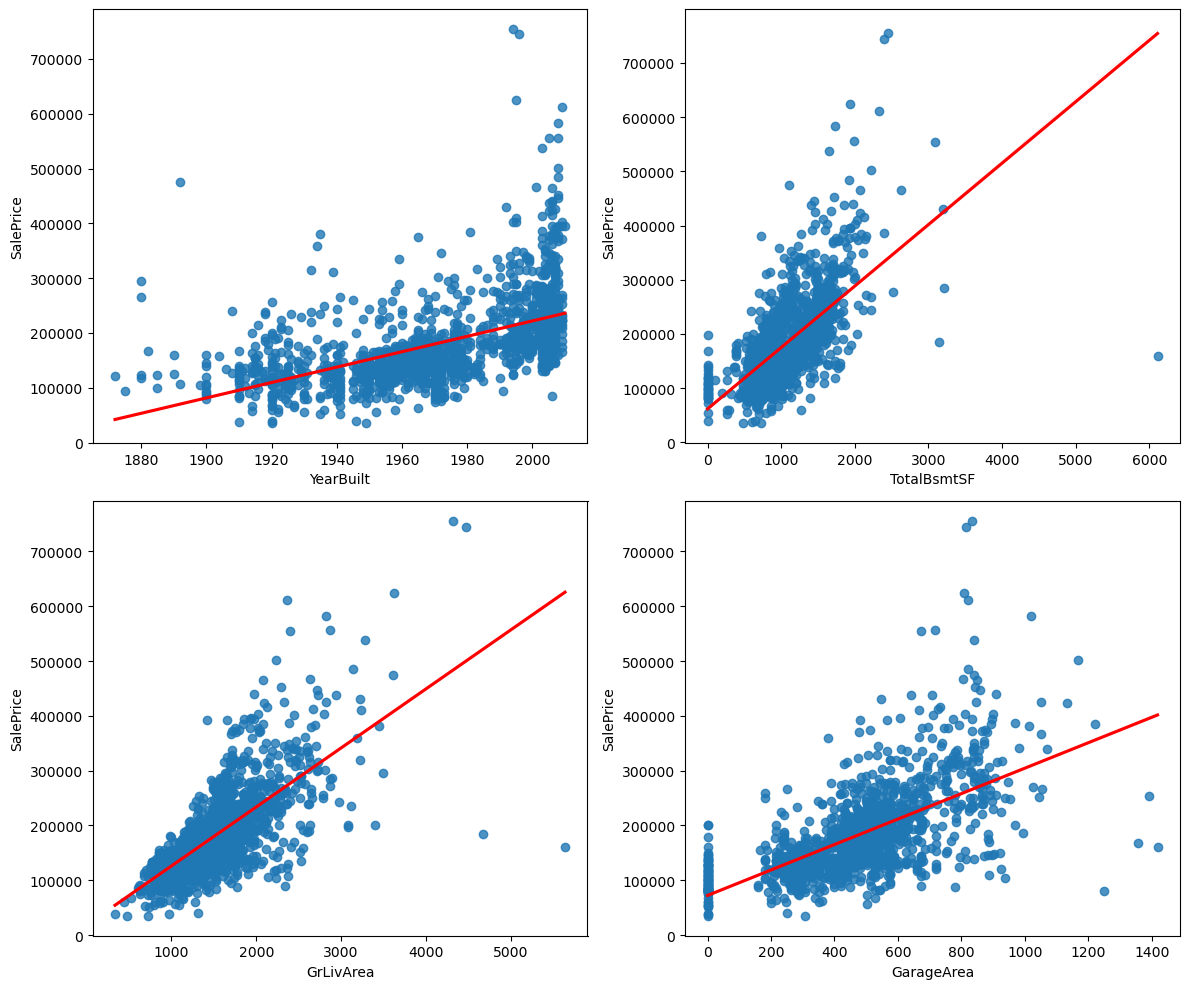

In [56]:
# Lets do Number vs Number analysis
plt.figure(figsize=(12,10))
t = 1
for i in data_num.columns:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data[i],y=data['SalePrice'],line_kws={'color':'red'},ci=0.95)
    t+=1
plt.tight_layout()
plt.show()

In [64]:
data[data['TotalBsmtSF']>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [65]:
data[data['GrLivArea']>4500]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [66]:
data[data['GarageArea']>1300]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
558,8,2008,2042,SBrkr,2042,2,Attchd,3,1390,253293
1155,4,1961,1249,SBrkr,1622,1,2Types,4,1356,168000
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [67]:
# lets drop 1260,1155, 500, 558
data.drop(index=[1260,1155,500,558],inplace=True)

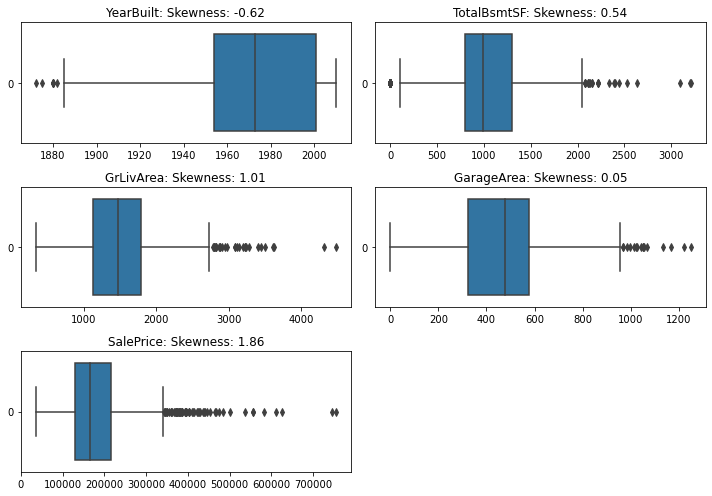

In [68]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.title('%s: Skewness: %.2f'%(i,data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

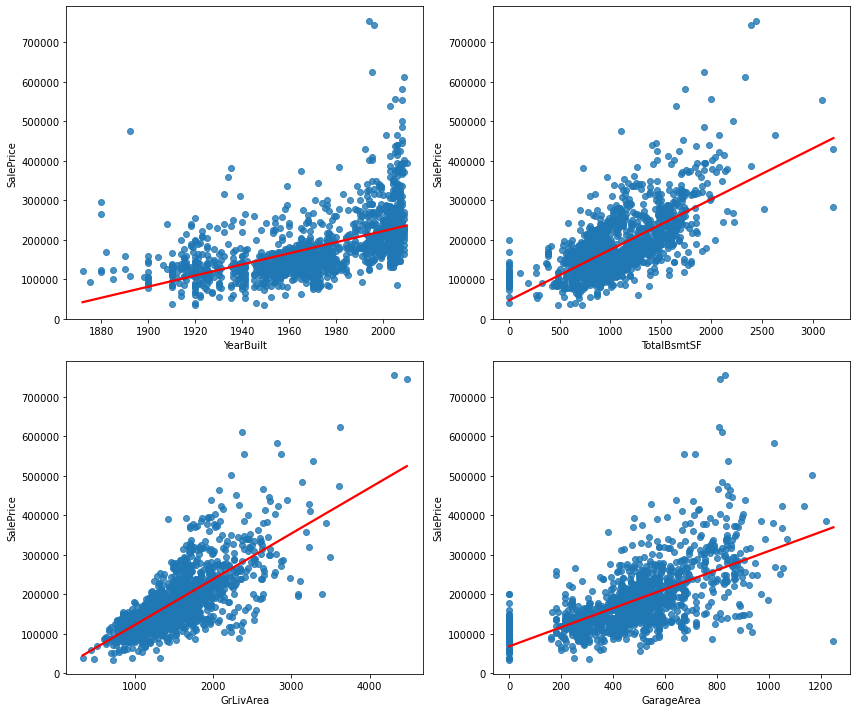

In [69]:
plt.figure(figsize=(12,10))
t = 1
for i in data_num.columns:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data[i],y=data['SalePrice'],line_kws={'color':'red'},ci=0)
    t+=1
plt.tight_layout()
plt.show()

## ENCODING

In [70]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


In [71]:
data.Electrical.value_counts()

SBrkr    1297
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [72]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)

In [73]:
# frequency encoding
d = data.GarageType.value_counts(normalize=True).to_dict()  # relative freaquncy

In [74]:
data['GarageType']=data['GarageType'].map(d)

In [75]:
d

{'Attchd': 0.5643564356435643,
 'Detchd': 0.2942008486562942,
 'BuiltIn': 0.06082036775106082,
 'NoGarage': 0.057284299858557285,
 'Basment': 0.013437057991513438,
 'CarPort': 0.006364922206506365,
 '2Types': 0.003536067892503536}

In [76]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,1,1710,2,0.564356,2,548,208500
1,6,1976,1262,1,1262,2,0.564356,2,460,181500
2,7,2001,920,1,1786,2,0.564356,2,608,223500
3,7,1915,756,1,1717,1,0.294201,3,642,140000
4,8,2000,1145,1,2198,2,0.564356,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,1,1647,2,0.564356,2,460,175000
1414,6,1978,1542,1,2073,2,0.564356,2,500,210000
1415,7,1941,1152,1,2340,2,0.564356,1,252,266500
1416,5,1950,1078,0,1078,1,0.294201,1,240,142125


## Transform

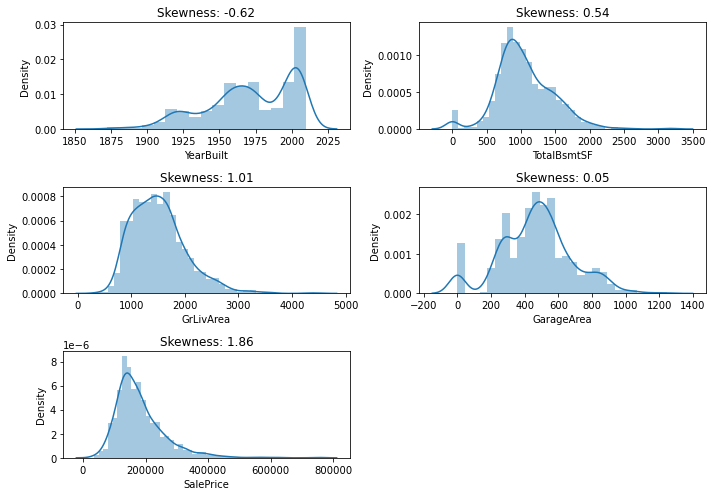

In [77]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title('Skewness: %.2f'%(data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

In [78]:
from sklearn.preprocessing import PowerTransformer

In [80]:
for i in data_num:
    if i != 'SalePrice':
        pt = PowerTransformer(standardize=False)
        data[i] = pt.fit_transform(pd.DataFrame(data[i]))

In [83]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,6.972463e+72,274.957673,1,10.084880,2,0.564356,2,216.758238,208500
1,6,5.140578e+72,375.305827,1,9.549463,2,0.564356,2,187.579975,181500
2,7,6.817766e+72,291.321477,1,10.162568,2,0.564356,2,236.172410,223500
3,7,2.541930e+72,248.884699,1,10.092167,1,0.294201,3,247.021774,140000
4,8,6.741652e+72,347.159988,1,10.537064,2,0.564356,3,307.151391,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,6.666351e+72,299.669185,1,10.018030,2,0.564356,2,187.579975,175000
1414,6,5.258711e+72,440.650830,1,10.430810,2,0.564356,2,200.955136,210000
1415,7,3.441114e+72,348.859649,1,10.651211,2,0.564356,1,114.033047,266500
1416,5,3.817865e+72,330.783951,0,9.276710,1,0.294201,1,109.517105,142125


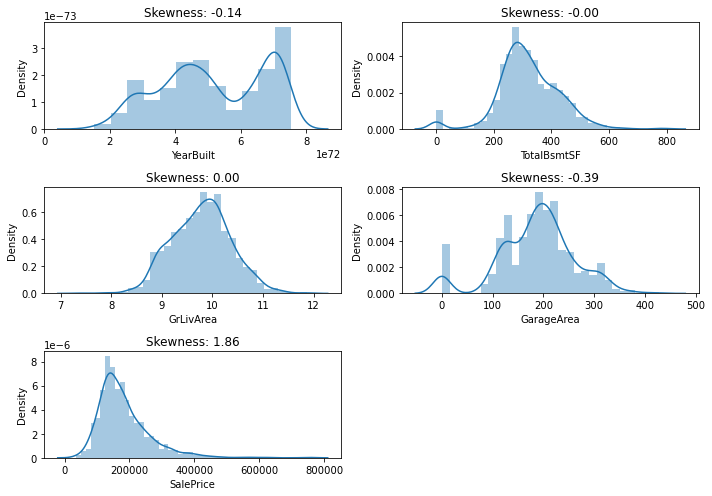

In [93]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title('Skewness: %.2f'%(data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

## TRAIN TEST SPLIT

In [84]:
x = data.drop(columns='SalePrice')
y = data['SalePrice']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
trainx,testx, trainy, testy = train_test_split(x,y,train_size=0.8,random_state=2)

In [87]:
print(trainx.shape,testx.shape,trainy.shape,testy.shape)

(1131, 9) (283, 9) (1131,) (283,)


## SACLING

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()

In [90]:
for i in data_num:
    if i != 'SalePrice':
        sc = StandardScaler()
        trainx[i] = sc.fit_transform(pd.DataFrame(trainx[i]))
        testx[i] = sc.transform(pd.DataFrame(testx[i]))

In [91]:
trainx

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
496,7,-1.442135,0.558715,1,1.162170,1,0.294201,1,-0.808868
621,5,-0.856284,-3.061506,1,-0.932513,1,0.294201,2,-0.158221
1371,4,-0.883922,-3.061506,0,-0.955297,2,0.294201,2,-0.158221
146,6,0.288264,0.458352,1,-0.448333,2,0.564356,2,0.271512
713,5,-1.754278,-2.039758,1,0.007511,2,0.294201,2,-0.435568
...,...,...,...,...,...,...,...,...,...
466,5,-0.200038,1.024228,1,0.116387,2,0.564356,2,0.143319
299,7,0.668896,0.719216,1,1.924718,2,0.564356,3,0.873828
493,10,1.443589,2.139487,1,1.070408,2,0.564356,3,1.872544
528,5,-0.654075,-0.256731,0,-1.292482,1,0.564356,1,-0.779557


In [92]:
testx

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
880,5,-0.562545,0.164501,0,1.443022,2,0.294201,2,0.112176
370,5,-1.922746,-0.420283,1,-0.133828,1,0.294201,1,-0.323717
1145,7,0.537890,0.421679,1,1.761381,2,0.564356,2,1.029021
1389,5,1.237290,-0.742666,1,0.775833,2,0.060820,2,-0.379483
548,6,-0.593390,-0.412906,1,-1.502405,1,0.294201,1,-0.779557
...,...,...,...,...,...,...,...,...,...
613,5,-1.754278,-0.581413,0,-1.741764,1,0.057284,0,-2.476427
509,5,-0.713444,-3.061506,1,-1.630398,1,0.294201,1,-0.286711
684,3,-1.240467,-2.021097,1,-1.996786,1,0.057284,0,-2.476427
536,7,1.137405,0.779802,1,0.263444,2,0.564356,2,-0.158221
